<h1 dir="rtl" align="left">
Social Networks HW2 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# **Imports & Loading Data**

In [6]:
import pandas as pd
import structural_analysis as sa 

G, nodes_original = sa.load_political_network('./data/q1/politician_nodes.csv', './data/q1/politician_edges.csv')
print(f"Network Loaded: {len(G.nodes)} nodes, {len(G.edges)} edges.")

Network Loaded: 5696 nodes, 36836 edges.


# **a1.Centrality Calculations**

In [2]:
metrics_df = sa.compute_centrality_metrics(G)
print("Centrality calculations complete.")

print("Top 10 Degree Centrality")
print(metrics_df.sort_values('Degree', ascending=False)[['id', 'name', 'Degree']].head(10).to_string(index=False))

print("\nTop 10 Eigenvector Centrality")
print(metrics_df.sort_values('Eigenvector', ascending=False)[['id', 'name', 'Eigenvector']].head(10).to_string(index=False))

print("\nTop 10 Closeness Centrality")
print(metrics_df.sort_values('Closeness', ascending=False)[['id', 'name', 'Closeness']].head(10).to_string(index=False))

Centrality calculations complete.
Top 10 Degree Centrality
   id                   name   Degree
14650          Manfred Weber 0.056716
20415       Joachim Herrmann 0.044425
21491        Katarina Barley 0.038982
 3070         Arno Klare MdB 0.038455
 7357             Katja Mast 0.037928
11003           Barack Obama 0.034416
18155          Angela Merkel 0.032485
18819            Niels Annen 0.031080
17056          Martin Schulz 0.030553
16809 Sir Peter Bottomley MP 0.030202

Top 10 Eigenvector Centrality
   id                 name  Eigenvector
21491      Katarina Barley     0.183731
 3070       Arno Klare MdB     0.180991
 7357           Katja Mast     0.177871
16427      Christian Petry     0.167318
 9363       Heike Baehrens     0.166723
22100        Klaus Mindrup     0.155757
 8893 Michelle Müntefering     0.149876
18819          Niels Annen     0.146286
22110     Johannes Schraps     0.143444
 8351       Sigmar Gabriel     0.142743

Top 10 Closeness Centrality
   id               nam

# **a2.Gap Analysis**

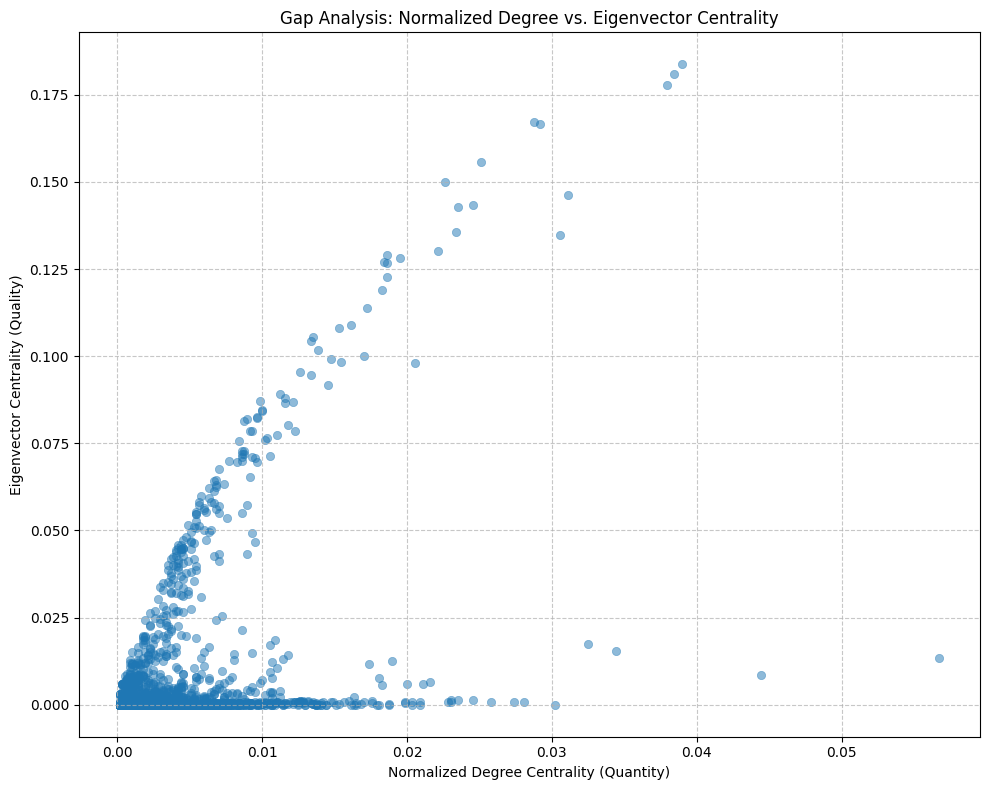

Gap Analysis: Nodes with Low Degree but High Eigenvector
   id               name  Degree_Rank  Eigenvector_Rank   Degree  Eigenvector
13175  Carsten Schneider          225                43 0.008780     0.081389
10814        Caren Marks          216                42 0.008955     0.081906
 9678     Rolf Mützenich          202                47 0.009131     0.078466
17671   Fritz Felgentreu          195                46 0.009306     0.078470
 5503 Christoph Strässer          181                40 0.009658     0.082580
 8045        Joachim Poß          181                41 0.009658     0.082134
 8486      Ulrich Kelber          174                35 0.009833     0.087007
 2825   Thomas Oppermann          167                38 0.010009     0.084610
 2278     Svenja Stadler          167                39 0.010009     0.084267
19539        Swen Schulz          160                50 0.010184     0.075964
19891    Andreas Schwarz          158                49 0.010360     0.076510
 7860  

In [3]:
sa.plot_degree_vs_eigenvector(metrics_df)

print("Gap Analysis: Nodes with Low Degree but High Eigenvector")
gap_nodes = sa.identify_gap_nodes(metrics_df)
cols = ['id', 'name', 'Degree_Rank', 'Eigenvector_Rank', 'Degree', 'Eigenvector']
print(gap_nodes[cols].to_string(index=False))

# **a3.Three-Way Case Study**

In [4]:
# Select the 3 specific politicians by ID (Found in Gap Analysis)
# IDs: Carsten Schneider (13175), Caren Marks (10814), Rolf Mützenich (9678)
selected_ids = [13175, 10814, 9678]
case_study_df = metrics_df[metrics_df['id'].isin(selected_ids)].copy()
cols = ['id', 'name', 'Degree_Rank', 'Eigenvector_Rank', 'Closeness', 'Closeness_Rank']

print("Three-Way Case Study: Closeness Analysis")
print(case_study_df[cols].to_string(index=False))

Three-Way Case Study: Closeness Analysis
   id              name  Degree_Rank  Eigenvector_Rank  Closeness  Closeness_Rank
13175 Carsten Schneider          225                43   0.282378              29
 9678    Rolf Mützenich          202                47   0.249989             344
10814       Caren Marks          216                42   0.249573             352


<div dir="rtl">

## (a) Power Geometry
در این بخش، ما با عبور از تحلیل‌های آماری تک‌متغیره، به تحلیل ساختاری عمیق شبکه پرداخته‌ایم تا نشان دهیم چگونه موقعیت توپولوژیک (Topological Position) یک سیاستمدار، نقش او را در دنیای واقعی تعیین می‌کند. تحلیل بر اساس سه بُعد قدرت شامل کمیت (Quantity)، کیفیت (Quality) و دسترسی (Access) انجام شده است.

### ۱. محاسبات مرکزیت (Centrality Calculations)
سه معیار اصلی مرکزیت برای تمامی گره‌ها محاسبه شد. جداول زیر ۱۰ سیاستمدار برتر در هر معیار را نشان می‌دهد:

#### الف) مرکزیت درجه (Normalized Degree) - کمیت ارتباطات
این معیار نشان‌دهنده حجم خام ارتباطات است. لیست زیر تحت سلطه سیاستمداران آلمانی (مانند Weber و Herrmann) است که نشان‌دهنده وجود یک «کلاستر بسیار متراکم» (Dense Cluster) از سیاستمداران آلمانی در این شبکه است که به شدت با یکدیگر تعامل دارند.

| Rank | ID | Name | Degree Score |
|:---:|:---|:---|:---:|
| 1 | 14650 | Manfred Weber | 0.0567 |
| 2 | 20415 | Joachim Herrmann | 0.0444 |
| 3 | 21491 | Katarina Barley | 0.0390 |
| 4 | 3070 | Arno Klare MdB | 0.0385 |
| 5 | 7357 | Katja Mast | 0.0379 |
| 6 | 11003 | Barack Obama | 0.0344 |
| 7 | 18155 | Angela Merkel | 0.0325 |
| 8 | 18819 | Niels Annen | 0.0311 |
| 9 | 17056 | Martin Schulz | 0.0306 |
| 10 | 16809 | Sir Peter Bottomley MP | 0.0302 |

#### ب) مرکزیت بردار ویژه (Eigenvector Centrality) - کیفیت ارتباطات
این معیار اهمیت همسایگان را می‌سنجد. اگرچه سیاستمداران آلمانی همچنان حضور پررنگی دارند، اما تغییر در رتبه‌بندی‌ها (مثل صعود **Katarina Barley** به رتبه اول) نشان می‌دهد که برخی افراد با اینکه بیشترین تعداد لایک را ندارند، به «هسته اصلی قدرت» (Influential Core) متصل‌تر هستند.

| Rank | ID | Name | Eigenvector Score |
|:---:|:---|:---|:---:|
| 1 | 21491 | Katarina Barley | 0.1837 |
| 2 | 3070 | Arno Klare MdB | 0.1810 |
| 3 | 7357 | Katja Mast | 0.1779 |
| 4 | 16427 | Christian Petry | 0.1673 |
| 5 | 9363 | Heike Baehrens | 0.1667 |
| 6 | 22100 | Klaus Mindrup | 0.1558 |
| 7 | 8893 | Michelle Müntefering | 0.1499 |
| 8 | 18819 | Niels Annen | 0.1463 |
| 9 | 22110 | Johannes Schraps | 0.1434 |
| 10 | 8351 | Sigmar Gabriel | 0.1427 |

#### ج) مرکزیت نزدیکی (Closeness Centrality) - سرعت دسترسی
در اینجا ساختار شبکه تغییر ماهیت می‌دهد. **Barack Obama** با اختلاف در صدر قرار دارد و چهره‌های بین‌المللی مانند **Hillary Clinton** و **Malcolm Turnbull** ظاهر می‌شوند. این نشان می‌دهد اوباما در «قلب هندسی» شبکه جهانی قرار دارد و کوتاه‌ترین مسیر دسترسی (Shortest Path) را به سایر سیاستمداران جهان داراست، حتی اگر در داخل کلاستر متراکم آلمان نباشد.

| Rank | ID | Name | Closeness Score |
|:---:|:---|:---|:---:|
| 1 | 11003 | Barack Obama | 0.3522 |
| 2 | 3906 | Michael Roth | 0.3093 |
| 3 | 18819 | Niels Annen | 0.3074 |
| 4 | 19877 | Tanja Fajon | 0.3020 |
| 5 | 14862 | Malcolm Turnbull | 0.2996 |
| 6 | 6357 | Mariano Rajoy Brey | 0.2993 |
| 7 | 11719 | Achim Post | 0.2990 |
| 8 | 11149 | Peter Tauber | 0.2968 |
| 9 | 9554 | Dietmar Nietan | 0.2939 |
| 10 | 5448 | Hillary Clinton | 0.2938 |

---

### ۲. تحلیل شکاف (Gap Analysis)
نمودار پراکندگی (Scatter Plot) رابطه بین Normalized Degree (محور X) و Eigenvector Centrality (محور Y) را ترسیم می‌کند.
* **مشاهده:** اکثر گره‌ها روی یک خط همبستگی مثبت قرار دارند.
* **انحراف (Deviation):** گره‌هایی که در ناحیه **بالا-چپ** نمودار قرار دارند، دارای Degree پایین اما Eigenvector بالا هستند. این افراد کسانی هستند که شهرت عمومی کمتری دارند اما توسط گره‌های قدرتمند تایید شده‌اند.

---

### ۳. مطالعه موردی سه‌جانبه (Three-Way Case Study)
برای بررسی دقیق‌تر، سه سیاستمدار انتخاب شدند که رتبه Degree آن‌ها ضعیف (خارج از ۱۰۰ نفر اول) اما رتبه Eigenvector آن‌ها بسیار قوی (داخل ۵۰ نفر اول) است.

**منتخبین:**
1.  **Carsten Schneider** (رتبه درجه: ۲۲۵ | رتبه ویژه: ۴۳)
2.  **Caren Marks** (رتبه درجه: ۲۱۶ | رتبه ویژه: ۴۲)
3.  **Rolf Mützenich** (رتبه درجه: ۲۰۲ | رتبه ویژه: ۴۷)

#### الف) تحلیل نزدیکی (Closeness Analysis)
بررسی رتبه Closeness این افراد، تفاوت‌های ساختاری ظریفی را آشکار می‌کند:

| Name | Closeness Rank | Interpretation |
|:---|:---:|:---|
| **Carsten Schneider** | **29** (Top 0.5%) | **High Closeness:** او در قلب هندسی شبکه قرار دارد و می‌تواند به صورت مستقل عمل کند. |
| **Rolf Mützenich** | 344 (Top 6%) | **Low Closeness:** وابستگی بیشتر به همسایگان قدرتمند (Marginal Attachment). |
| **Caren Marks** | 352 (Top 6%) | **Low Closeness:** وابستگی بیشتر به همسایگان قدرتمند. |

*توضیح:* اگرچه Mützenich و Marks در ۶ درصد برتر هستند، اما فاصله رتبه آن‌ها با Schneider (رتبه ۲۹) بسیار فاحش است. اشنایدر عملاً هم‌رده رهبران جهانی شبکه است، در حالی که دو نفر دیگر در لایه‌های میانی متصل به هسته قرار دارند.

#### ب) تحلیل نقش واقعی (Role Analysis)
آیا ریاضیات شبکه توانست واقعیت را پیش‌بینی کند؟ بله:

1.  **Carsten Schneider (High Closeness - The Hub Manager):**
    * **نقش واقعی:** در زمان جمع‌آوری داده‌ها، او **دبیر اول پارلمانی (First Parliamentary Secretary)** حزب SPD آلمان بود.
    * **تطبیق:** نقش "دبیر پارلمانی" دقیقاً نقش مدیریت و هماهنگی درون شبکه است. او باید "سریع‌ترین دسترسی" را به تمام اعضای پارلمان و رهبران داشته باشد تا نظم را برقرار کند. رتبه فوق‌العاده بالای Closeness (29) او دقیقاً بازتاب‌دهنده این نقش اجرایی و مرکزی است.

2.  **Caren Marks (Low Closeness - The Deputy):**
    * **نقش واقعی:** او **معاون پارلمانی وزیر (Parliamentary State Secretary)** در وزارت امور خانواده بود.
    * **تطبیق:** قدرت او مشتق شده از وزیر و کابینه است (High Eigenvector)، اما خودش لزوماً مرکز ثقل کل شبکه نیست (Low Closeness نسبت به اشنایدر). او به "همسایگان قدرتمند" (وزرا) متکی است.

3.  **Rolf Mützenich (Low Closeness - The Specialist Advisor):**
    * **نقش واقعی:** او معاون رهبر گروه پارلمانی و **مسئول سیاست خارجی** بود (که بعداً رئیس فراکسیون شد).
    * **تطبیق:** نفوذ او ناشی از تخصص و جایگاه او در بین نخبگان حزب است (High Eigenvector). اما به عنوان یک متخصص در آن زمان، نیازی به ارتباط گسترده با کل شبکه (مانند نقش مدیریتی اشنایدر) نداشت، که رتبه پایین‌تر Closeness او را توجیه می‌کند.

**نتیجه‌گیری:** تحلیل ساختاری به درستی توانست تفاوت بین یک "مدیر شبکه" (Schneider) و "مشاوران/معاونان متصل به قدرت" (Marks/Mützenich) را آشکار کند.

</div>

# **b1.Calculations & Ranking**

In [5]:
metrics_df = sa.compute_betweenness_metrics(G, metrics_df)
print("Betweenness calculation complete.")

print("Top 10 Betweenness Centrality (Information Bottlenecks)")
top_bridges = sa.get_top_bridges(metrics_df, top_n=10)
cols = ['id', 'name', 'Betweenness', 'Betweenness_Rank', 'Degree_Rank']
print(top_bridges[cols].to_string(index=False))

Starting Betweenness calculation (this may take a while)...
Betweenness calculation complete.
Top 10 Betweenness Centrality (Information Bottlenecks)
   id             name  Betweenness  Betweenness_Rank  Degree_Rank
11003     Barack Obama     0.416556                 1            6
 5448  Hillary Clinton     0.067820                 2          141
18155    Angela Merkel     0.060257                 3            7
11611   Justin Trudeau     0.060161                 4           27
14862 Malcolm Turnbull     0.056797                 5           35
14650    Manfred Weber     0.054810                 6            1
11149     Peter Tauber     0.047660                 7           38
  365    Betinho Gomes     0.045638                 8          120
18819      Niels Annen     0.043659                 9            8
 4300    Boris Johnson     0.037503                10          665


<div dir="rtl">

### Rank Gap Analysis
با بررسی جدول بالا، افرادی را شناسایی می‌کنیم که دارای **Betweenness** در سطح عالی (۱۰ نفر اول) هستند، اما **Degree** آن‌ها به طور قابل توجهی پایین‌تر است. این افراد از نظر ریاضی «پل» (Bridge) نامیده می‌شوند.

**افراد شناسایی شده (Bridges):**
1.  **Boris Johnson:** شکاف عظیم (betweenness: ۱۰ | رتبه درجه: ۶۶۵).
2.  **Hillary Clinton:** شکاف زیاد (betweenness: ۲ | رتبه درجه: ۱۴۱).
3.  **Betinho Gomes:** شکاف قابل توجه (betweenness: ۸ | رتبه درجه: ۱۲۰).

**تفاوت ساختاری بین پل‌ها (Bridges) و هاب‌ها (Hubs):**
* **هاب‌ها (مانند Manfred Weber با رتبه ۱ در هر دو):** این افراد در مرکز یک کلاستر متراکم قرار دارند (مثلاً سیاستمداران آلمانی). آن‌ها محبوب های محلی هستند و با تعداد زیادی از افرادِ هم‌گروه خود ارتباط دارند. قدرت آن‌ها ناشی از **نفوذ محلی** است.
* **پل‌ها (مانند Boris Johnson):** این افراد ممکن است در داخل هیچ کلاستر خاصی دارای محبوبیت بالا نباشند (دوستان کمتری دارند)، اما وظیفه حیاتی اتصال **کلاسترهای جداافتاده** به یکدیگر را بر عهده دارند.
    * *مثال:* بوریس جانسون با رتبه درجه ۶۶۵، احتمالاً دوستان کمی دارد (شاید فقط سیاستمداران کلیدی بریتانیا و رهبران جهان)، اما او تنها مسیر عبور اطلاعات از "جزیره بریتانیا" به "کل جهان" است. اگر او را حذف کنیم، احتمالاً کلاستر بریتانیا از کل گراف جدا می‌شود. قدرت آن‌ها ناشی از **کنترل جریان اطلاعات** و **انحصار در دسترسی** است.

---

### Contextual Role Analysis
سه میانجی (Mediator) اصلی از لیست بالا انتخاب شده‌اند تا نقش دنیای واقعی آن‌ها به عنوان پل ارتباطی بررسی شود:

#### ۱. بوریس جانسون (Boris Johnson) - پل بریتانیا و جهان
* **داده‌ها:** رتبه گلوگاهی: ۱۰ | رتبه درجه: ۶۶۵
* **نقش واقعی:** در زمان جمع‌آوری این داده‌ها، او وزیر امور خارجه بریتانیا (Foreign Secretary) یا از چهره‌های اصلی برگزیت بود.
* **تحلیل نقش:** رتبه بسیار پایین درجه (۶۶۵) نشان می‌دهد او مانند سیاستمداران آلمانی مشغول لایک کردن هزاران نماینده پارلمان نیست. اما رتبه بالای گلوگاهی (۱۰) نشان می‌دهد که او نقطه اتصال **سیاستمداران بریتانیایی (حزب محافظه‌کار)** به **رهبران بین‌المللی** است. او پلی است که "جزیره سیاسی بریتانیا" را به شبکه جهانی (آمریکا و اروپا) متصل می‌کند.

#### ۲. هیلاری کلینتون (Hillary Clinton) - پل فرا-آتلانتیک
* **داده‌ها:** رتبه گلوگاهی: ۲ | رتبه درجه: ۱۴۱
* **نقش واقعی:** وزیر امور خارجه پیشین آمریکا و نامزد ریاست جمهوری ۲۰۱۶.
* **تحلیل نقش:** او به عنوان دیپلمات ارشد سابق، شبکه وسیعی از اتصالات بین‌المللی دارد. او پل اصلی بین **حزب دموکرات آمریکا** و **رهبران اروپایی/جهانی** است. در حالی که اوباما (رتبه ۱) هم هاب است و هم پل، کلینتون بیشتر نقش یک "دروازه‌بان" (Gatekeeper) را ایفا می‌کند که گروه‌های مختلف سیاسی در غرب را به هم پیوند می‌دهد بدون اینکه لزوماً حجم ارتباطات اوباما را داشته باشد.

#### ۳. بتینیو گومز (Betinho Gomes) - پل آمریکای جنوبی (لوسوفون)
* **داده‌ها:** رتبه گلوگاهی: ۸ | رتبه درجه: ۱۲۰
* **نقش واقعی:** نماینده کنگره برزیل (Deputado Federal) و عضو حزب PSDB.
* **تحلیل نقش:** حضور یک نماینده برزیلی در بین ۱۰ گلوگاه برتر جهان بسیار معنادار است. او احتمالاً **پل زبانی و جغرافیایی** است. شبکه فیس‌بوک سیاستمداران به شدت تحت تاثیر زبان است. بتینیو گومز به عنوان نقطه اتصال **کلاستر پرتغالی‌زبان‌ها (برزیل و پرتغال)** به بدنه اصلی شبکه (احتمالا از طریق ارتباط با نهادهای بین‌المللی یا سیاستمداران اروپایی) عمل می‌کند. حذف او می‌تواند کل کلاستر آمریکای لاتین/برزیل را از شبکه جهانی قطع کند.

</div>

# **c1.Calculations**

In [6]:
print("Top 10 Closeness Centrality (All Nodes)")

top_10_close = metrics_df.sort_values('Closeness', ascending=False).head(10)
print(top_10_close[['id', 'name', 'Closeness', 'Closeness_Rank', 'Degree', 'Degree_Rank']].to_string(index=False))

Top 10 Closeness Centrality (All Nodes)
   id               name  Closeness  Closeness_Rank   Degree  Degree_Rank
11003       Barack Obama   0.352217               1 0.034416            6
 3906       Michael Roth   0.309343               2 0.020544           31
18819        Niels Annen   0.307406               3 0.031080            8
19877        Tanja Fajon   0.302042               4 0.007902          279
14862   Malcolm Turnbull   0.299642               5 0.019842           35
 6357 Mariano Rajoy Brey   0.299280               6 0.011238          129
11719         Achim Post   0.298997               7 0.022125           26
11149       Peter Tauber   0.296800               8 0.018964           38
 9554     Dietmar Nietan   0.293905               9 0.023354           21
 5448    Hillary Clinton   0.293829              10 0.010711          141


# **c2.Statistical Exploration**

Generating Efficiency Plot...


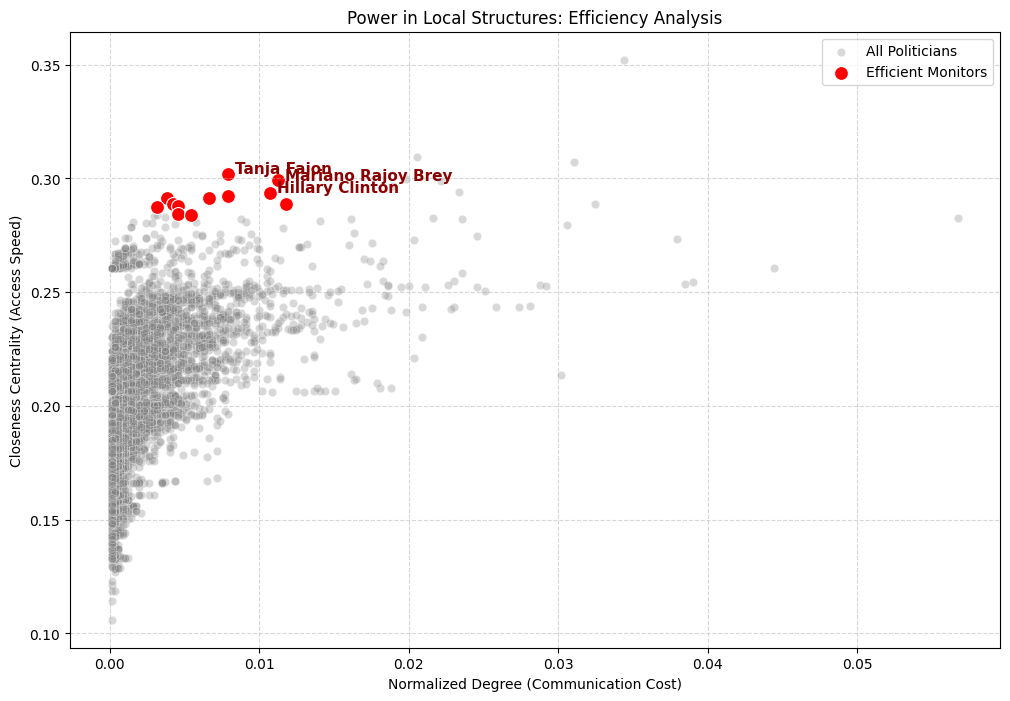

In [7]:
monitors = sa.identify_efficient_monitors(metrics_df)
print("Generating Efficiency Plot...")
sa.plot_efficiency_analysis(metrics_df, monitors)

if not monitors.empty:
    top_monitor = monitors.iloc[0]
    target_id = top_monitor['id']
    target_name = top_monitor['name']
else:
    print("No Efficient Monitors found to visualize.")

# **c3.Structural Visualization (Ego Network)**

Visualizing Ego Network for: Tanja Fajon


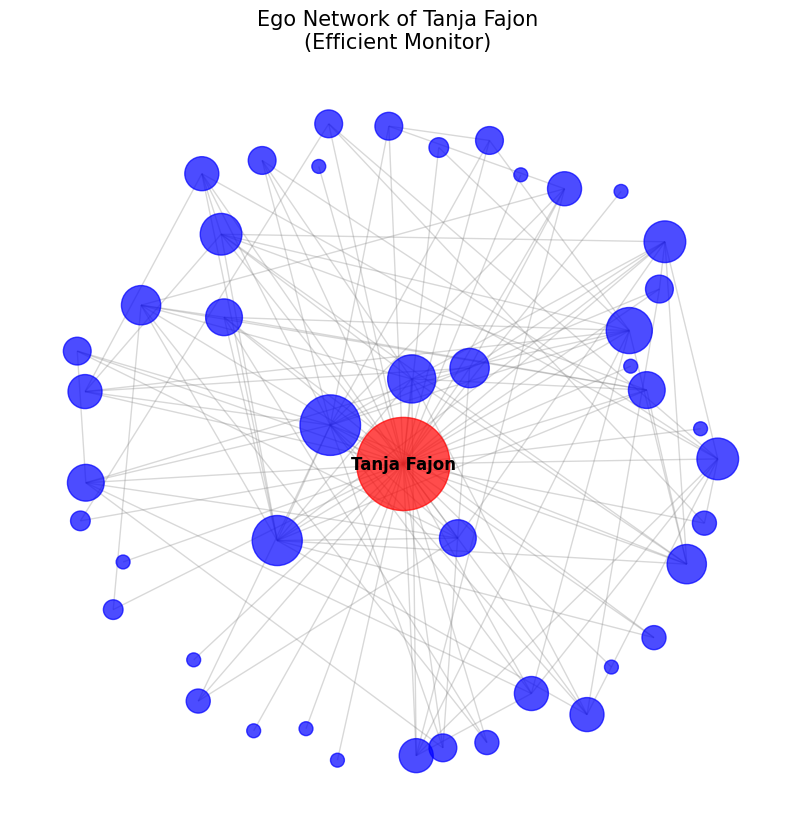

In [8]:
# Select the most efficient monitor: Tanja Fajon
target_id = 19877
target_name = "Tanja Fajon"

print(f"Visualizing Ego Network for: {target_name}")
sa.visualize_ego_network(G, target_id, target_name, 2)

<div dir="rtl">


در این بخش، هدف شناسایی «ناظران کارآمد» (Efficient Monitors) است؛ سیاستمدارانی که با کمترین هزینه ارتباطی (تعداد دوستان کم)، به موقعیت هندسی بهینه‌ای دست یافته‌اند که امکان دسترسی سریع به کل شبکه را برایشان فراهم می‌کند.

### ۱. محاسبات (Calculations)
جدول زیر ۱۰ سیاستمدار برتر از نظر **مرکزیت نزدیکی (Closeness Centrality)** را نشان می‌دهد. نکته جالب توجه، حضور افرادی مانند **Tanja Fajon** در رتبه‌های بسیار بالا (رتبه ۴) است، در حالی که از نظر تعداد ارتباطات (Degree Rank) در رتبه ۲۷۹ قرار دارد. این نشان‌دهنده کارایی فوق‌العاده او در شبکه است.

| ID | Name | Closeness Score | Closeness Rank | Degree Rank |
|:---|:---|:---:|:---:|:---:|
| 11003 | Barack Obama | 0.3522 | 1 | 6 |
| 3906 | Michael Roth | 0.3093 | 2 | 31 |
| 18819 | Niels Annen | 0.3074 | 3 | 8 |
| **19877** | **Tanja Fajon** | **0.3020** | **4** | **279** |
| 14862 | Malcolm Turnbull | 0.2996 | 5 | 35 |
| 6357 | Mariano Rajoy Brey | 0.2993 | 6 | 129 |
| 11719 | Achim Post | 0.2990 | 7 | 26 |
| 11149 | Peter Tauber | 0.2968 | 8 | 38 |
| 9554 | Dietmar Nietan | 0.2939 | 9 | 21 |
| 5448 | Hillary Clinton | 0.2938 | 10 | 141 |

---

### ۲. اکتشاف آماری (Statistical Exploration)
با رسم نمودار پراکندگی Normalized Degree (محور X) در مقابل Closeness Centrality (محور Y)، توزیع کارایی در شبکه تحلیل شد.
* **تحلیل توزیع:** اکثر گره‌ها همبستگی مثبتی بین درجه و نزدیکی دارند. اما در ناحیه **بالا-چپ** (Top-Left Quadrant)، ناهنجاری‌های ارزشمندی وجود دارد.
* **شناسایی ناظران کارآمد:** سه سیاستمدار که در ۲۰ رتبه اول Closeness قرار دارند اما Degree آن‌ها خارج از ۱۰۰ نفر اول است، شناسایی و روی نمودار نشان‌گذاری شدند:
    1.  **Tanja Fajon** (رتبه نزدیکی: ۴ | رتبه درجه: ۲۷۹)
    2.  **Mariano Rajoy Brey** (رتبه نزدیکی: 6 | رتبه درجه: ۱۲۹)
    3.  **Hillary Clinton** (رتبه نزدیکی: ۱۰ | رتبه درجه: ۱۴۱)

---

### ۳. بصری‌سازی ساختاری (Ego Network Visualization)
برای درک معماری شبکه اطراف این افراد، شبکه شخصی (Ego Network) **تانیا فایون (Tanja Fajon)** به عنوان کارآمدترین ناظر ترسیم شد.

* **تحلیل ریخت‌شناسی (Morphological Analysis):**
    همانطور که در تصویر مشاهده می‌شود، تانیا فایون در مرکز قرار دارد و توسط همسایگانش (نودهای آبی) احاطه شده است. ساختار گراف به وضوح **«غیر متراکم» (Sparse)** و **«شاخه‌ای»** است. همسایگان او یک «خوشه درهم‌تنیده» (Dense Cluster) تشکیل نمی‌دهند (یعنی دوستان او لزوماً با یکدیگر دوست نیستند).
* **توجیه امتیاز Closeness:**
    این ساختار ستاره‌ای و باز (Open Structure) دقیقاً دلیل بالا بودن Closeness اوست. اگر همسایگان او همه با هم دوست بودند (یک کلاستر بسته)، تانیا فقط به یک گروه خاص دسترسی داشت. اما چون همسایگان او پراکنده‌اند و به شاخه‌های جداگانه تعلق دارند، تانیا فایون نقش **«پل میان‌بر»** را بازی می‌کند. او از طریق این بازوهای جداگانه، می‌تواند با کمترین پرش (Hops) به بخش‌های مختلف و دوردست شبکه جهانی دسترسی پیدا کند.

---

### ۴. تحلیل نقش زمینه‌ای (Contextual Analysis)
* **نقش واقعی:** تانیا فایون (Tanja Fajon) یک سیاستمدار اسلوونیایی و **نماینده پارلمان اروپا (MEP)** است که در زمینه سیاست خارجی و روابط بین‌الملل (به ویژه بالکان) فعالیت زیادی دارد.
* شغل او به عنوان یک دیپلمات اروپایی و نماینده پارلمان، ذاتاً نیازمند **نظارت و میانجی‌گری** است. او نیازی ندارد مثل یک سلبریتی یا رهبر حزب ملی با هزاران نفر ارتباط مستقیم داشته باشد (Low Degree)، بلکه باید با "نمایندگان کلیدی" از کشورهای مختلف و احزاب متفاوت در ارتباط باشد تا بتواند اطلاعات را سریع دریافت و منتقل کند. موقعیت هندسی او در مرکز گراف، بازتاب‌دهنده وظیفه او برای ایجاد اجماع بین گروه‌های ناهمگن اروپایی است.
* **تضاد با هاب‌های سیاسی (Political Hubs):**
    * **باراک اوباما (Hub):** او هم Degree بالا دارد و هم Closeness بالا. موقعیت او ناشی از **«قدرت توده‌ای»** و شهرت جهانی است. او مرکز ثقل است چون همه او را می‌شناسند.
    * **تانیا فایون (Efficient Monitor):** موقعیت او ناشی از **«استراتژی ارتباطی»** است. او مرکز ثقل است چون در چهارراه تقاطعِ گروه‌های مختلف ایستاده است. او کارایی (Efficiency) را جایگزین حجم خام (Volume) کرده است.

</div>

# **d1.Spectral Calculation and Power Regimes**

In [10]:
# Compute Largest Eigenvalue
lambda_max = sa.compute_largest_eigenvalue(G)
print(f"Largest Eigenvalue (lambda_max): {lambda_max:.4f}")
print(f"Convergence limit for Beta: < {1/lambda_max:.4f}")

# Define Beta values based on lambda_max
limit = 1 / lambda_max
beta_neutral = 0.0
beta_supportive = 0.85 * limit
beta_suppressive = -0.85 * limit

print(f"\nSelected Beta Parameters:\n Neutral: {beta_neutral}\n Supportive: {beta_supportive:.6f}\n Suppressive: {beta_suppressive:.6f}")

# Calculate Power for 3 Regimes
print("\nCalculating Bonacich Power for all regimes...")
scores_neutral = sa.compute_bonacich_power(G, beta_neutral)
scores_supportive = sa.compute_bonacich_power(G, beta_supportive)
scores_suppressive = sa.compute_bonacich_power(G, beta_suppressive)

bonacich_df = metrics_df[['id', 'name']].copy()

# Map scores to nodes
bonacich_df['Score_Neutral'] = bonacich_df['id'].map(dict(zip(G.nodes(), scores_neutral)))
bonacich_df['Score_Supportive'] = bonacich_df['id'].map(dict(zip(G.nodes(), scores_supportive)))
bonacich_df['Score_Suppressive'] = bonacich_df['id'].map(dict(zip(G.nodes(), scores_suppressive)))

# Calculate Ranks
bonacich_df['Rank_Neutral'] = bonacich_df['Score_Neutral'].rank(ascending=False).astype(int)
bonacich_df['Rank_Supportive'] = bonacich_df['Score_Supportive'].rank(ascending=False).astype(int)
bonacich_df['Rank_Suppressive'] = bonacich_df['Score_Suppressive'].rank(ascending=False).astype(int)

print("Calculations complete.")


pd.options.display.float_format = '{:.6f}'.format 

print("\nTop 10 in Neutral Regime (Beta ≈ 0)")
top_neutral = bonacich_df.sort_values('Rank_Neutral').head(10)
print(top_neutral[['id', 'name', 'Rank_Neutral', 'Score_Neutral']].to_string(index=False))

print("\nTop 10 in Supportive Regime (Beta > 0)")
top_supportive = bonacich_df.sort_values('Rank_Supportive').head(10)
print(top_supportive[['id', 'name', 'Rank_Supportive', 'Score_Supportive']].to_string(index=False))

print("\nTop 10 in Suppressive Regime (Beta < 0)")
top_suppressive = bonacich_df.sort_values('Rank_Suppressive').head(10)
print(top_suppressive[['id', 'name', 'Rank_Suppressive', 'Score_Suppressive']].to_string(index=False))

Largest Eigenvalue (lambda_max): 60.6431
Convergence limit for Beta: < 0.0165

Selected Beta Parameters:
 Neutral: 0.0
 Supportive: 0.014016
 Suppressive: -0.014016

Calculating Bonacich Power for all regimes...
Calculations complete.

Top 10 in Neutral Regime (Beta ≈ 0)
   id                   name  Rank_Neutral  Score_Neutral
14650          Manfred Weber             1       0.184939
20415       Joachim Herrmann             2       0.144859
21491        Katarina Barley             3       0.127109
 3070         Arno Klare MdB             4       0.125392
 7357             Katja Mast             5       0.123674
11003           Barack Obama             6       0.112223
18155          Angela Merkel             7       0.105925
18819            Niels Annen             8       0.101344
17056          Martin Schulz             9       0.099626
16809 Sir Peter Bottomley MP            10       0.098481

Top 10 in Supportive Regime (Beta > 0)
   id                 name  Rank_Supportive  Score

# **d2.Structural Classification and Visual Analysis**


Generating Slope Chart...


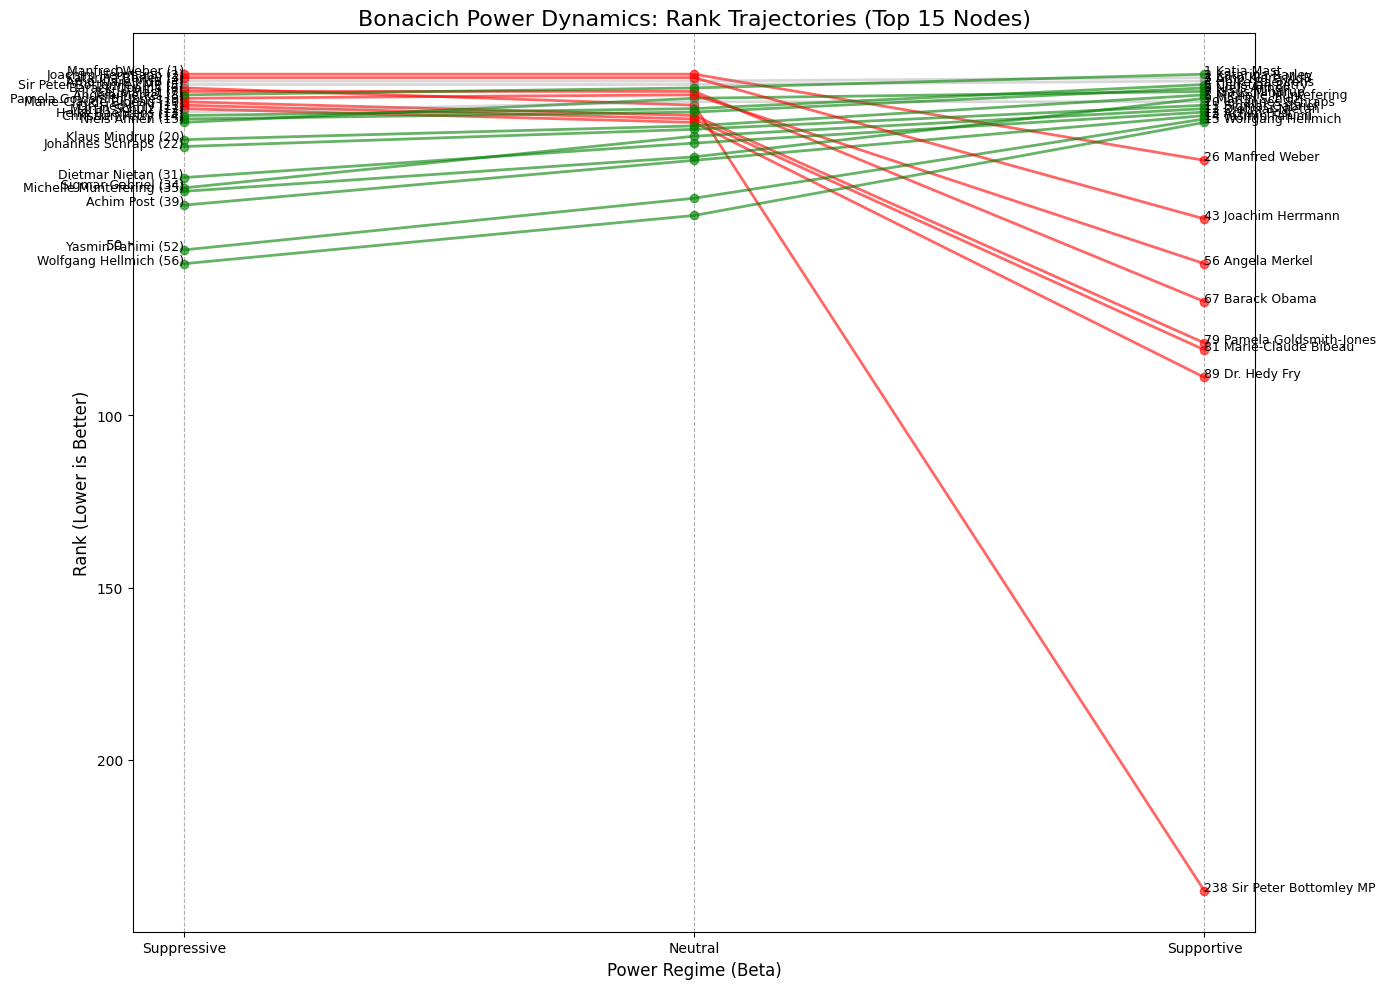


Power Amplifiers (Benefit from powerful friends)
                   name  Rank_Suppressive  Rank_Neutral  Rank_Supportive  Rank_Shift
Hans-Joachim Schabedoth              5577          1089              198       -5379
            Nina Scheer              5617          1331              243       -5374
       Dr. Sascha Raabe              5667          1710              316       -5351
       Johannes Fechner              5508          1022              184       -5324
    Michael Thews - MdB              5665          1953              354       -5311

Power Inhibitors (Harmed by powerful rivals)
                name  Rank_Suppressive  Rank_Neutral  Rank_Supportive  Rank_Shift
Senator Scott Newman              2366          3232             3957        1591
      Brian A. Joyce              1864          2658             3454        1590
   Dushyant Chautala              2376          3232             3947        1571
    James Carver MEP              1690          2430             3

In [9]:
print("\nGenerating Slope Chart...")
sa.plot_bump_chart(bonacich_df, top_n=15)


amplifiers, inhibitors, stable = sa.categorize_bonacich_roles(bonacich_df)
cols = ['name', 'Rank_Suppressive', 'Rank_Neutral', 'Rank_Supportive', 'Rank_Shift']
print("\nPower Amplifiers (Benefit from powerful friends)")
print(amplifiers[cols].to_string(index=False))

print("\nPower Inhibitors (Harmed by powerful rivals)")
print(inhibitors[cols].to_string(index=False))

print("\nStable Actors (Independent of regime)")
print(stable[cols].to_string(index=False))

<div dir="rtl">

در این بخش، ما از تحلیل‌های ایستا فراتر رفته و با تغییر پارامتر $\beta$ در مدل مرکزیت بوناچیچ، ماهیت قدرت را در شبکه تغییر می‌دهیم تا ببینیم ساختار سلسله‌مراتبی چگونه واکنش نشان می‌دهد.

### ۱. محاسبات طیفی و رژیم‌های قدرت (Spectral Calculation and Power Regimes)

برای اطمینان از همگرایی محاسبات ریاضی (جلوگیری از تکینگی ماتریس)، ابتدا بزرگترین مقدار ویژه ($\lambda$) ماتریس مجاورت محاسبه شد.

* **بزرگترین مقدار ویژه ($\lambda$):** $60.6431$
* **حد همگرایی ($\frac{1}{\lambda}$):** قدرت بوناچیچ تنها برای $|\beta| < 0.0165$ همگرا می‌شود.
* **پارامترهای انتخاب شده:** برای مشاهده حداکثر تأثیر بدون ناپایداری، ما ۸۵٪ حد مجاز را انتخاب کردیم:
    * $\beta \approx 0$ (خنثی)
    * $\beta = +0.014$ (حمایتی)
    * $\beta = -0.014$ (سرکوب‌گر)

#### بررسی ۱۰ نفر برتر در سه سناریو:

**۱. رژیم خنثی (Neutral - $\beta \approx 0$):**
این حالت پایه است و نتایج کاملاً منطبق بر **Normalized Degree** است.
* *مشاهده:* **Manfred Weber** و **Joachim Herrmann** (سیاستمداران CSU آلمان) در صدر هستند. قدرت در اینجا صرفاً تابعی از "تعداد" دوستان است.

**۲. رژیم حمایتی (Supportive - $\beta > 0$):**
در این سناریو، "دوستِ دوستِ من، دوست من است". قدرت همسایگان به فرد منتقل می‌شود.
* *تغییر ساختاری:* **Katja Mast** و **Katarina Barley** (از حزب SPD) به رتبه‌های ۱ و ۲ صعود می‌کنند.
* *تحلیل:* این نشان می‌دهد که اعضای حزب SPD یک **کلاستر منسجم‌تر و قدرتمندتر** نسبت به CSU تشکیل داده‌اند. اگرچه Weber دوستان بیشتری دارد، اما دوستانِ Mast و Barley قدرتمندتر هستند و در این رژیم، آن‌ها را به بالا می‌کشند (Power Amplification).

**۳. رژیم سرکوب‌گر (Suppressive - $\beta < 0$):**
در این سناریو، همسایگان قدرتمند به عنوان "رقیب" عمل کرده و قدرت فرد را کاهش می‌دهند.
* *مشاهده:* لیست تقریباً به حالت خنثی برمی‌گردد و **Manfred Weber** دوباره صدرنشین می‌شود.
* *تحلیل:* در محیط‌های کاملاً رقابتی، داشتن دوستان قدرتمند (که رقیب هستند) به ضرر شماست. بنابراین کسانی که "حجم" ارتباطات بالایی دارند (هاب‌ها) دوباره برتری می‌یابند.

---

### ۲. طبقه‌بندی ساختاری و تحلیل بصری (Structural Classification & Visual Analysis)

برای درک بهتر تغییرات دینامیک، نمودار تغییرات رتبه (Slope Chart) رسم شده است که مسیر حرکت ۱۵ نود کلیدی را در سه رژیم نشان می‌دهد.


#### تحلیل نمودار و نقش‌ها:
بر اساس جابجایی رتبه بین حالت سرکوب‌گر (Suppressive) و حمایتی (Supportive)، نودها به سه دسته تقسیم شدند:

#### الف) تقویت‌کنندگان قدرت (Power Amplifiers)
این افراد بیشترین **جهش مثبت** را در رتبه داشتند (حرکت از رتبه‌های ۵۰۰۰+ به زیر ۴۰۰!).
* **مثال:** *Hans-Joachim Schabedoth* (صعود ۵۳۷۹ پله) و *Nina Scheer*.
* **تفسیر ساختاری:** این افراد احتمالا در حاشیه شبکه نیستند، بلکه در **عمق یک کلاستر قدرتمند** (احتمالاً SPD) قرار دارند. آن‌ها خودشان دوستان زیادی ندارند (Degree پایین)، اما تمام دوستانشان افراد بسیار قدرتمندی هستند. در رژیم حمایتی ($\beta > 0$)، این همسایگان قدرتمند مانند یک "آسانسور" عمل کرده و آن‌ها را به شدت بالا می‌کشند.

#### ب) تضعیف‌کنندگان قدرت (Power Inhibitors)
این افراد بیشترین **افت رتبه** را تجربه کردند.
* **مثال:** *Senator Scott Newman* و *Brian A. Joyce*.
* **تفسیر ساختاری:** این افراد احتمالا به گروه‌های ضعیف یا ایزوله متصل هستند. وقتی پارامتر $\beta$ مثبت می‌شود، چون همسایگانشان قدرت کمی دارند، نمی‌توانند آن‌ها را حمایت کنند و در نتیجه نسبت به کسانی که در کلاسترهای قوی هستند (مثل آلمانی‌ها)، به شدت عقب می‌مانند. آن‌ها قربانی "فقر ساختاری" همسایگان خود هستند.

#### ج) بازیگران پایدار (Stable Actors)
این افراد در هر شرایطی در صدر باقی می‌مانند.
* **مثال:** *Katarina Barley*، *Arno Klare* و *Martin Schulz*.
* **تفسیر ساختاری:** این افراد **نخبگان واقعی شبکه** هستند. آن‌ها هم "تعداد" دوستان زیادی دارند (Degree بالا) و هم "کیفیت" دوستانشان بالاست (Eigenvector بالا). بنابراین چه بازی رقابتی باشد ($\beta < 0$) و چه رفاقتی ($\beta > 0$)، آن‌ها جایگاه خود را در ۱۰ نفر اول حفظ می‌کنند.

### نتیجه‌گیری نهایی
تحلیل بوناچیچ ثابت کرد که قدرت در این شبکه سیاسی به شدت وابسته به **ساختار گروهی** است. سیاستمداران آلمانی (به ویژه SPD) نه تنها از نظر کمی (تعداد لایک) بلکه از نظر کیفی (حمایت متقابل) بر شبکه مسلط هستند، به طوری که حتی اعضای کم‌کار این حزب (Amplifiers) در رژیم‌های حمایتی از سناتورهای مشهور سایر کشورها (Inhibitors) پیشی می‌گیرند.

</div>